In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
teacher_survey = pd.read_excel('../Data/2018 _Teacher_Survey.xlsx')

In [3]:
pd.options.display.max_columns = 100

In [4]:
path = '../Data/2018_rc_data.xlsx'
xl = pd.ExcelFile(path)
sheet_names = xl.sheet_names
sheet_names

['READ ME_Instructions',
 'ACT',
 'achievement',
 'discipline',
 'chronic_absenteeism',
 'CTE',
 'dropout',
 'ELPA',
 'enrollment',
 'finance',
 'grad_rate',
 'growth',
 'growth_subjects',
 'indicator_level_grades',
 'long_term_ell',
 'overall_grades',
 'postsec_enrollment',
 'ready_grad',
 'staffing',
 'success_rate',
 'teacher_retention',
 'district_info',
 'school_info']

In [5]:
for sheetname in sheet_names:
    if sheetname == 'teacher_retention':
        vars()['df' + sheetname] = pd.read_excel(path, sheet_name= sheetname)

In [49]:
dfteacher_retention

,district_number,district_name,school_number,school_name,year,percent_retained
0,0,State of Tennessee,0,NaN,2018,90.9
1,10,Anderson County Schools,0,NaN,2018,89.5
2,10,Anderson County Schools,2,Anderson County High School,2018,95.1
3,10,NaN,3,NaN,2018,78.6
4,10,Anderson County Schools,5,Andersonville Elementary,2018,92.0
...,...,...,...,...,...,...
1887,985,Achievement School District,15,Frayser Achievement Elementary,2018,20.0
1888,985,Achievement School District,20,Whitney Achievement Elementary School,2018,38.1
1889,985,Achievement School District,25,Georgian Hills Achievement Elementary School,2018,42.9
1890,985,Achievement School District,8010,Cornerstone Prep - Lester Campus,2018,62.5


In [52]:
teacher_survey.head()

,Number,DistrictNo,DistrictName,SchoolNo,SchoolName,School-Level Teacher Response Rate,Item_18,Topic,FullQuestion,Prompt,Answer_Options,See_Column,Strongly Disagree,Disagree,Agree,Strongly Agree,Not Applicable,Never,Rarely,Sometimes,Almost Always,No Role at All,Small Role,Moderate Role,Large Role,_5% or Less,_6%-10%,_11%-15%,_16%-25%,More than 25%,Not or Minimally Empowered,Much More Constrained than Empowered,Slightly More Constrained than Empowered,Neutral,Slightly More Empowered than Constrained,Much More Empowered than Constrained,Significantly Empowered,Predominantly Paper Content,Somewhat Based on Paper Over Digital Content,Slightly Based on Paper Over Digital Content,Evenly Based on Paper and Digital Content,Slightly Based on Digital Over Paper Content,Somewhat Based on Digital Over Paper Content,Predominantly Digital Content,Focused more on improving my teaching than judging my performance.,Focused more on judging my performance than improving my teaching.,Equally focused on improving my teaching and judging my performance.,I need both more PD experiences and higher quality PD in this area.,I need more PD experiences that emphasize this area.,I need higher quality PD in this area.,I am satisfied with both the quality and amount of PD received in this area.,Inconsistent,Moderately consistent,Very consistent,I don't know,"For now, I am unconvinced that RTI2 will improve student learning in my school.","I have seen positive results, but the program needs significant improvement.",I strongly believe that RTI2 has and will continue to improve student learning.,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01a,School Climate and Leadership,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,Likert Scale,M,0.000000,0.142857,0.500000,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01b,School Climate and Leadership,Please indicate the extent to which you agree ...,Staff at this school have an effective process...,Likert Scale,M,0.000000,0.285714,0.571429,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01c,School Climate and Leadership,Please indicate the extent to which you agree ...,Teachers are encouraged to participate in scho...,Likert Scale,M,0.000000,0.142857,0.428571,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01d,School Climate and Leadership,Please indicate the extent to which you agree ...,The staff at this school like being here; I wo...,Likert Scale,M,0.000000,0.214286,0.428571,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01e,School Climate and Leadership,Please indicate the extent to which you agree ...,I feel appreciated for the job that I am doing.,Likert Scale,M,0.142857,0.071429,0.428571,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#teacher_survey = teacher_survey.drop(['Number', 'DistrictNo', 'SchoolNo'], axis=1)

In [53]:
ts = teacher_survey[teacher_survey['Item_18'].isin(['TC_01a', 'TC_01f', 'TC_15a','TC_02b', 'TC_18h','TC_07','TC_15b', 'TC_15c','TC_15d', 'TC_08a', 'TC_08b', 'TC_08c'])]

In [59]:
ts = ts[ts['Answer_Options'].isin(['Likert Scale'])]

In [11]:
ts['Item_18'].unique()

array(['TC_01a', 'TC_01f', 'TC_02b', 'TC_08a', 'TC_08b', 'TC_08c',
       'TC_15a', 'TC_15b', 'TC_15c', 'TC_15d'], dtype=object)

In [55]:
#ts= ts[['DistrictName', 'SchoolName', 'Item_18','Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']]

In [56]:
ts.head()

,Number,DistrictNo,DistrictName,SchoolNo,SchoolName,School-Level Teacher Response Rate,Item_18,Topic,FullQuestion,Prompt,Answer_Options,See_Column,Strongly Disagree,Disagree,Agree,Strongly Agree,Not Applicable,Never,Rarely,Sometimes,Almost Always,No Role at All,Small Role,Moderate Role,Large Role,_5% or Less,_6%-10%,_11%-15%,_16%-25%,More than 25%,Not or Minimally Empowered,Much More Constrained than Empowered,Slightly More Constrained than Empowered,Neutral,Slightly More Empowered than Constrained,Much More Empowered than Constrained,Significantly Empowered,Predominantly Paper Content,Somewhat Based on Paper Over Digital Content,Slightly Based on Paper Over Digital Content,Evenly Based on Paper and Digital Content,Slightly Based on Digital Over Paper Content,Somewhat Based on Digital Over Paper Content,Predominantly Digital Content,Focused more on improving my teaching than judging my performance.,Focused more on judging my performance than improving my teaching.,Equally focused on improving my teaching and judging my performance.,I need both more PD experiences and higher quality PD in this area.,I need more PD experiences that emphasize this area.,I need higher quality PD in this area.,I am satisfied with both the quality and amount of PD received in this area.,Inconsistent,Moderately consistent,Very consistent,I don't know,"For now, I am unconvinced that RTI2 will improve student learning in my school.","I have seen positive results, but the program needs significant improvement.",I strongly believe that RTI2 has and will continue to improve student learning.,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01a,School Climate and Leadership,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,Likert Scale,M,0.000000,0.142857,0.500000,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,10,Anderson County,5,Andersonville Elementary,0.565217,TC_01f,School Climate and Leadership,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,Likert Scale,M,0.000000,0.142857,0.428571,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,10,Anderson County,5,Andersonville Elementary,0.565217,TC_02b,School Climate and Leadership,Please indicate the extent to which you agree ...,The staff feels comfortable raising issues and...,Likert Scale,M,0.142857,0.071429,0.428571,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23,10,Anderson County,5,Andersonville Elementary,0.565217,TC_08a,School Climate and Leadership,Please indicate the extent to which you agree ...,Teachers and parents think of each other as pa...,Likert Scale,M,0.000000,0.214286,0.714286,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,24,10,Anderson County,5,Andersonville Elementary,0.565217,TC_08b,School Climate and Leadership,Please indicate the extent to which you agree ...,Staff at this school work hard to build trusti...,Likert Scale,M,0.000000,0.214286,0.428571,0.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
ts['Negative']=ts['Strongly Disagree']+ts['Disagree']

In [88]:
ts['Positive']=ts['Strongly Agree']+ts['Agree']

In [89]:
All_teach_ret_surv= pd.merge(
left = ts [['DistrictNo', 'SchoolNo', 'Item_18','Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree', 'Positive', 'Negative']],
    right =dfteacher_retention[['district_number', 'school_number', 'percent_retained']].rename(columns = {'district_number':'DistrictNo', 'school_number':'SchoolNo'}),
)

In [90]:
All_teach_ret_surv.shape

(11550, 10)

In [69]:
ts.shape

(11670, 62)

In [93]:
All_teach_ret_surv['percent_retained']= pd.to_numeric(All_teach_ret_surv['percent_retained'],errors= 'coerce')

In [104]:
All_teach_ret_surv.columns

Index(['DistrictNo', 'SchoolNo', 'Item_18', 'Strongly Disagree', 'Disagree',
       'Agree', 'Strongly Agree', 'Positive', 'Negative', 'percent_retained'],
      dtype='object')

In [144]:
item18_ag=All_teach_ret_surv.groupby(['Item_18']).mean().reset_index()

In [145]:
item18_ag=item18_ag[['Item_18', 'Positive', 'Negative']]

In [148]:
item18_ag

,Item_18,Positive,Negative
0,TC_01a,0.845324,0.154676
1,TC_01f,0.891762,0.108238
2,TC_02b,0.789536,0.210464
3,TC_08a,0.688332,0.311668
4,TC_08b,0.932744,0.067256
5,TC_08c,0.740483,0.259517
6,TC_15a,0.892287,0.107713
7,TC_15b,0.773355,0.226645
8,TC_15c,0.804496,0.195504
9,TC_15d,0.804145,0.195855


<AxesSubplot:title={'center':'Teacher Survey Questions'}, xlabel='Item_18'>

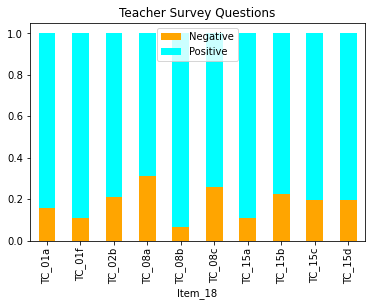

In [147]:
item18_ag.plot.bar(stacked=True,x= 'Item_18', y={'Positive', 'Negative'}, title='Teacher Survey Questions', color=("orange", "cyan", "purple", "yellow"), )

In [94]:
All_teach_ret_surv.corr()

,DistrictNo,SchoolNo,Strongly Disagree,Disagree,Agree,Strongly Agree,Positive,Negative,percent_retained
DistrictNo,1.000000,0.153373,-0.034589,-0.039693,-0.016946,0.050519,0.045131,-0.045131,0.040528
SchoolNo,0.153373,1.000000,0.010339,-0.045530,-0.070815,0.085697,0.034672,-0.034672,-0.229368
Strongly Disagree,-0.034589,0.010339,1.000000,0.312085,-0.262165,-0.279199,-0.603677,0.603677,-0.118337
Disagree,-0.039693,-0.045530,0.312085,1.000000,-0.183449,-0.621821,-0.945809,0.945809,-0.071543
Agree,-0.016946,-0.070815,-0.262165,-0.183449,1.000000,-0.612775,0.243546,-0.243546,0.028721
Strongly Agree,0.050519,0.085697,-0.279199,-0.621821,-0.612775,1.000000,0.617224,-0.617224,0.058785
Positive,0.045131,0.034672,-0.603677,-0.945809,0.243546,0.617224,1.000000,-1.000000,0.100411
Negative,-0.045131,-0.034672,0.603677,0.945809,-0.243546,-0.617224,-1.000000,1.000000,-0.100411
percent_retained,0.040528,-0.229368,-0.118337,-0.071543,0.028721,0.058785,0.100411,-0.100411,1.000000


In [101]:
questions=All_teach_ret_surv.groupby(['Item_18']).corr().reset_index()

In [102]:
questions[questions['level_1']== 'percent_retained']

,Item_18,level_1,DistrictNo,SchoolNo,Strongly Disagree,Disagree,Agree,Strongly Agree,Positive,Negative,percent_retained
8,TC_01a,percent_retained,0.040528,-0.229368,-0.190641,-0.147487,-0.028492,0.158109,0.190797,-0.190797,1.0
17,TC_01f,percent_retained,0.040528,-0.229368,-0.197708,-0.222738,-0.038688,0.177434,0.257794,-0.257794,1.0
26,TC_02b,percent_retained,0.040528,-0.229368,-0.153049,-0.148457,0.012433,0.143321,0.175864,-0.175864,1.0
35,TC_08a,percent_retained,0.040528,-0.229368,-0.147611,-0.050154,0.108535,-0.000864,0.088414,-0.088414,1.0
44,TC_08b,percent_retained,0.040528,-0.229368,-0.104921,-0.134233,0.031928,0.041322,0.148829,-0.148829,1.0
53,TC_08c,percent_retained,0.040528,-0.229368,-0.099944,-0.065157,0.150874,-0.070677,0.085996,-0.085996,1.0
62,TC_15a,percent_retained,0.040528,-0.229368,-0.104686,-0.094498,-0.015474,0.078000,0.115485,-0.115485,1.0
71,TC_15b,percent_retained,0.040528,-0.229368,-0.089798,-0.028904,0.068646,-0.004707,0.057422,-0.057422,1.0
80,TC_15c,percent_retained,0.040528,-0.229368,-0.057815,-0.018154,0.044391,-0.008085,0.036144,-0.036144,1.0
89,TC_15d,percent_retained,0.040528,-0.229368,-0.085999,0.021370,0.001258,0.012676,0.014534,-0.014534,1.0
